In [1]:
%load_ext autoreload
%autoreload 2

import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from albumentations import *
from torchvision import transforms
from torch.utils.data import DataLoader
from glob import glob
import segmentation_models_pytorch as smp

import torch.nn as nn 
import torch.nn.functional as F
from tqdm import tqdm 

import wandb
import logging
from tqdm import tqdm

# load dataset 
import RS_dataset
import RS_utils
import RS_models

In [2]:
#-- data
img_path = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/01.Models/04.SAM_fine/0.data/01.512_imgs"
mask_path = "/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/01.Models/04.SAM_fine/0.data/02.512_masks"

img_path_ship  = np.array(sorted(glob(os.path.join(img_path, "*.png"))) )
mask_path_ship = np.array(sorted(glob(os.path.join(mask_path, "*.png"))) )

aa = np.load("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/05.Training/Segmentation/03.data_list/512_ships.npy")

selected_paths_img = img_path_ship[aa]
selected_paths_mask  = mask_path_ship[aa]

#-- category 
ISAID_CLASSES_SHIP = (
    'background','ship','harbor' 
    )
ISAID_PALETTE_SHIP = {
    0: (0, 0, 0), 
    1: (0, 0, 63), 
    2: (0, 100, 155)}

In [3]:
dataset = RS_dataset.Seg_RS_dataset_edge(img_dir=selected_paths_img, mask_dir=selected_paths_mask, image_resize = None, phase="train",palette=ISAID_PALETTE_SHIP )

In [4]:
mask, edge = dataset.__getitem__(np.random.randint(0,400))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


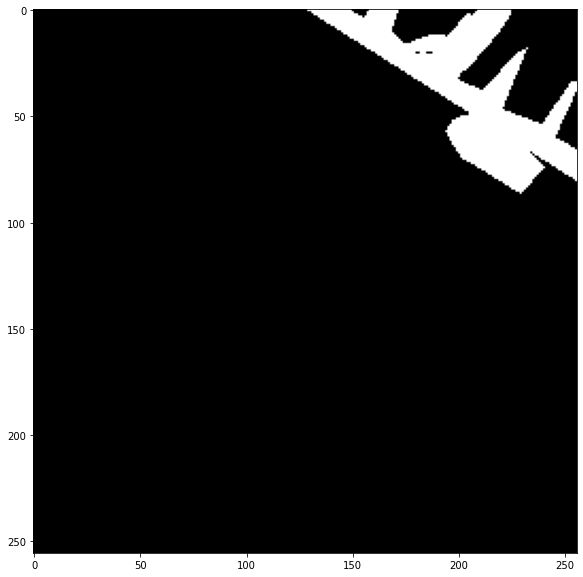

In [5]:
RS_utils.torch_display(mask)

In [6]:
edge.shape

torch.Size([1, 256, 256])

In [7]:
np.unique(edge)

array([0, 1])

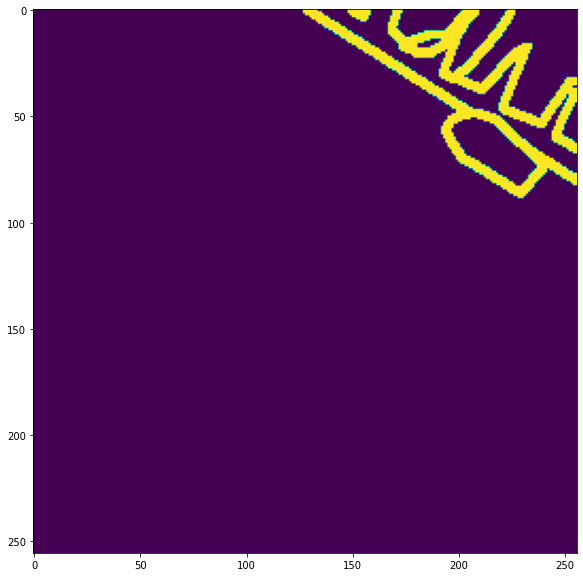

In [8]:
RS_utils.torch_display(edge)

In [11]:
model = smp.UnetPlusPlus(encoder_name="resnet152",classes=3)

In [12]:
edge
aa = "./02.ckpts"

w_path = sorted(glob(os.path.join(aa, "*.pt")))[-1]
print(w_path)
weights_ = torch.load(w_path, map_location=torch.device('cpu'))
model.load_state_dict(weights_)
model.eval()

./02.ckpts/ver_35_edgenet_epoch_21_iteration_97776.pt


UnetPlusPlus(
  (encoder): ResNetEncoder(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential

In [10]:
edge
aa = "./02.ckpts"

w_path = sorted(glob(os.path.join(aa, "*.pt")))[-1]
print(w_path)
weights_ = torch.load(w_path, map_location=torch.device('cpu'))
model.load_state_dict(weights_)
model.eval()

pred = model(mask)
pred = pred.detach().cpu()

./02.ckpts/ver_35_edgenet_epoch_21_iteration_97776.pt


ValueError: expected 4D input (got 3D input)

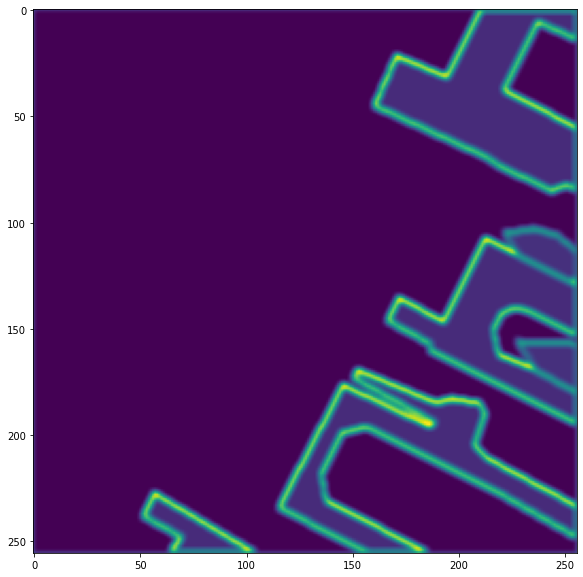

In [ ]:
RS_utils.torch_display(pred)

In [ ]:
torch.mean(pred)

tensor(-3.7290)

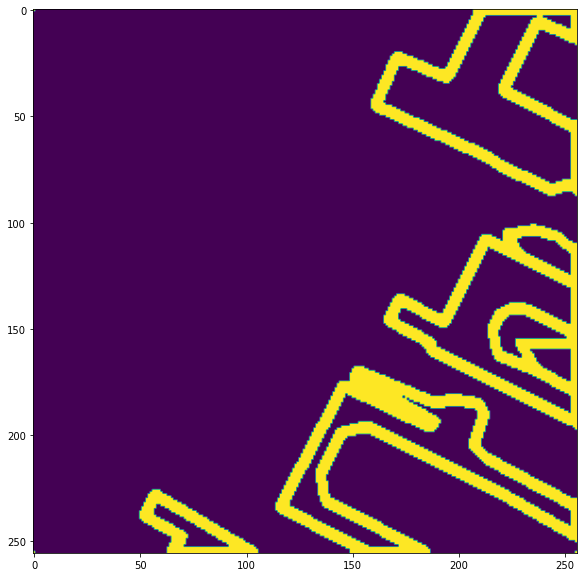

In [ ]:
part = pred.clone()
#map = part > 1
map = torch.sigmoid(part)
map = map > 0.1
#print(torch.mean(map))
RS_utils.torch_display(map)